<a href="https://colab.research.google.com/github/ahaque12/fiddler-survive-squid-game-mingle/blob/main/Fiddler_on_the_Proof_Survive_Squid_Game_Mingle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

https://substack.com/home/post/p-154508931?source=queue&autoPlay=false
In Season 2 of Squid Game, contestants play a game of “Mingle” (spoiler alert!). For each round of this game, the contestants all wait in a common area until a number is called. They must then split up into groups of that number. Any contestants not in a group of the correct number after 30 seconds … well, let’s just say bad things happen to them. For now, we’ll refer to contestants who make it through a round in a group of the correct size as having “survived” the round.

Suppose there are initially N contestants.

In the first round, contestants must form groups of 1. Okay, that’s not too hard; everyone survives. In the second round, contestants must form groups of 2. This continues (with groups of k in round k) until the 38th round, when contestants must form groups of 38.

What is the smallest number N such that there is at least one person who survives all 38 rounds?

# Approach
We need one person to survive all 38 rounds. If there were 38 people left in round 37 then none of the 38 would not survive because 37 would make a group in the 37th round eliminating one person, and then 37 wouldn't be able to make a group. Therefore the minimum size of the group is 2*37 = 74. We can continue working backwards, let $S_k$ represent the number of people needed at the start of round $k$. Then
$$
S_k >= max(\lceil \frac{S_{k+1}}{k} \rceil *k, S_{k+1})
$$

If $S_{38} = 38$ then we get $S_1 = 454$.

In [2]:
def curr(s, k):
  a = s // k
  b = s % k
  if b != 0:
    a += 1
  return max(a*k, s)

curr(38, 37)

74

In [3]:
def squid(k):
  s = k
  k -= 1
  while k >= 1:
    s = curr(s,k)
    k -= 1
  return s

squid(3)

4

In [4]:
squid(38)

454

# Extra Credit

There are N contestants about to play Mingle, where N is less than 500. This time, in each round, the number for group size can be anywhere from 1 to 10, with each number equally likely to be called. Also, the numbers called in the rounds are all independent of each other. It appears this version of Mingle will continue until there are no more survivors.

Before the game starts, one of the contestants, Young-il, does some quick computation. He says to his companion, Gi-hun: “Oh no, it’s too bad we only have N people.” (Of course, Young-il doesn’t actually say “N,” but rather the number that N represents.)

Young-il continues: “If we had started with N+1 people instead, I’d expect the game to last about 10 more rounds, on average.”

What is the value of N?

# Approach

Let $f(n)$ be the number of expected rounds played until there are no more survivors starting with $n$ people. Then

$$
f(n) = 1 + \frac{1}{10} \sum_{i=1}^{10} f(i*\lfloor \frac{n}{i} \rfloor)
$$

You can simplify this further to make it easy to compute. Let $x$ be the number of times the $n \mod i = 0$ and $y$ be the sum of $f(i*\lfloor \frac{n}{i} \rfloor)$ over $i$ where $n \mod i \neq 0$ then

$$
f(n) = \frac{y + 10}{10-x}
$$

In [5]:
import functools
import sympy

In [6]:
@functools.lru_cache(maxsize=2**20)
def exp_rounds(n):
  if n <= 0:
    return 0

  total = 0
  tk = 0
  for i in range(1, 11):
    m = n % i

    if m == 0:
      tk += 1
    else:
      total += exp_rounds(n-m)

  total = sympy.Rational(total + 10, (10-tk))
  return total

exp_rounds(1)

10/9

In [7]:
exp_rounds(2)

5/4

In [8]:
results = np.array([exp_rounds(i) for i in range(1, 500)])
len(results)

499

<BarContainer object of 499 artists>

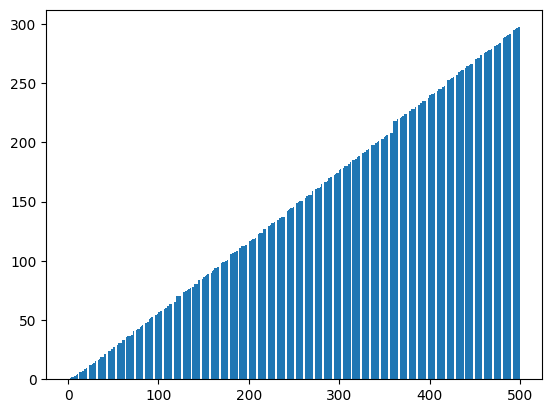

In [9]:
plt.bar(range(1, len(results) + 1), results)

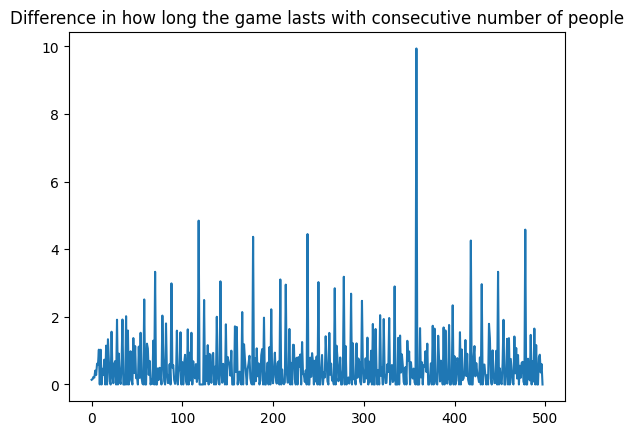

In [17]:
plt.plot(results[1:] - results[:-1])
plt.title("Difference in how long the game lasts with consecutive number of people");

In [11]:
np.where(results[1:] - results[:-1] > 8)

(array([358]),)

In [12]:
N = 359
float(exp_rounds(N+1) - exp_rounds(N))

9.941231997336596

# Verify results

In [13]:
def game(n):
  if n <= 0:
    return 0
  i = np.random.randint(1, 11)
  return 1 + game(n - (n % i))

game(10)

4

In [14]:
def simulate(n, nsim=1000):
  total = 0
  for _ in range(nsim):
    total += game(n)

  return total / nsim

simulate(10)

4.783

In [15]:
simulate(360) - simulate (359)

10.84299999999999